
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Ejercicio 3: Comunicación y visualización

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

### Lectura y Curado del Dataset

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Separación de lenguajes por frecuencia y creación de filas con lenguajes independientes:

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
# En la columna `programming_language` se encuentra cada lenguaje por separado. 
# Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, 
# Python"`, la fila ha sido replicada 3 veces.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:30]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


Nos quedamos con los 30 lenguajes más frecuentes:

In [ ]:
# Get a list with the N=30 most frequent language
# Hypothesis: less frequence languages offer limited statistical
# relevance to study their expected salary
language_list = language_count[['language']]
language_list = language_list[language_list.language != "ninguno"]
language_list = language_list[:30]
# language_list

In [ ]:
# Filter interesting languages based on the list above
popular_df_lang = df_lang.loc[df_lang['programming_language'].isin(language_list.language)]
popular_df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    # Computing IQR
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1  
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (Q3+1.5*IQR))
    mask_outlier &= (interesting_col >= (Q1-1.5*IQR))
    return dataset[mask_outlier]
df_lang_limpio = clean_outliers(popular_df_lang, "salary_monthly_NETO")
df_lang_limpio[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
df_lang_limpio["salary_monthly_NETO"].quantile([.90, .95, .98, .99, .995, .998])

0.900    130000.0
0.950    150000.0
0.980    175000.0
0.990    180000.0
0.995    188938.0
0.998    190000.0
Name: salary_monthly_NETO, dtype: float64

In [ ]:
# Asumo que los que tienen un salario alto son los que estan en el percentil 90
high_salary = df_lang_limpio.salary_monthly_NETO.quantile(0.9)
high_salary

130000.0

Calculamos la probabilidad condicional de cobrar un salario dentro del 90-percentil de mejores salarios en la muestra (mejor al 90%). (Ver notebook parte 1 para más detalle.)

In [ ]:
high_salary_df = df_lang_limpio[df_lang_limpio.salary_monthly_NETO > high_salary]

d = {'programming_language': [], 'total_programmers': [], 'high_salary_programmers': []}
proba = pd.DataFrame(data=d)
for pl in language_list.iterrows():
  pl = pl[1][0] # me quedo con la columna y fila donde esta el lenguaje
  proba.loc[len(proba)] = [pl,len(df_lang_limpio[df_lang_limpio.programming_language == pl]),len(high_salary_df[high_salary_df.programming_language == pl])]
proba["prob"] = proba['high_salary_programmers']/proba["total_programmers"]
proba = proba.sort_values("prob",ascending=False)
proba

,programming_language,total_programmers,high_salary_programmers,prob
18,scala,91.0,33.0,0.362637
24,objective-c,39.0,11.0,0.282051
15,kotlin,164.0,36.0,0.219512
11,go,245.0,47.0,0.191837
19,swift,83.0,15.0,0.180723
16,groovy,145.0,24.0,0.165517
17,ruby,113.0,17.0,0.150442
27,dart,38.0,5.0,0.131579
25,delphi,38.0,5.0,0.131579
6,bash/shell,890.0,111.0,0.124719


### Visualización Joyplot

In [ ]:
# Install and import joypy matplotlib library
!pip install joypy
import joypy
from matplotlib import cm

In [ ]:
array = "{" # {'z':0,'x':1,'y':2}
pos = 0
for index, row in proba.iterrows():
  array += "'" + row['programming_language'] + "':" + str(pos) + ","
  pos += 1
array += "}"
array

"{'scala':0,'objective-c':1,'kotlin':2,'go':3,'swift':4,'groovy':5,'ruby':6,'dart':7,'delphi':8,'bash/shell':9,'python':10,'java':11,'typescript':12,'assembler':13,'php':14,'cobol':15,'javascript':16,'.net':17,'r':18,'html':19,'css':20,'sql':21,'abap':22,'c':23,'perl':24,'c#':25,'c++':26,'vba':27,'actionscript':28,'powershell':29,}"

In [ ]:
name_sort = {'scala':0,'objective-c':1,'kotlin':2,'go':3,'swift':4,'groovy':5,'ruby':6,'dart':7,'delphi':8,'bash/shell':9,'python':10,'java':11,'typescript':12,'assembler':13,'php':14,'cobol':15,'javascript':16,'.net':17,'r':18,'html':19,'css':20,'sql':21,'abap':22,'c':23,'perl':24,'c#':25,'c++':26,'vba':27,'actionscript':28,'powershell':29,}
df_lang_limpio['name_sort'] = df_lang_limpio.programming_language.map(name_sort)
df_lang_limpio = df_lang_limpio.sort_values(['name_sort'], ascending=[1])
df_lang_limpio = df_lang_limpio.drop('name_sort', axis=1)

<Figure size 2280x1520 with 0 Axes>

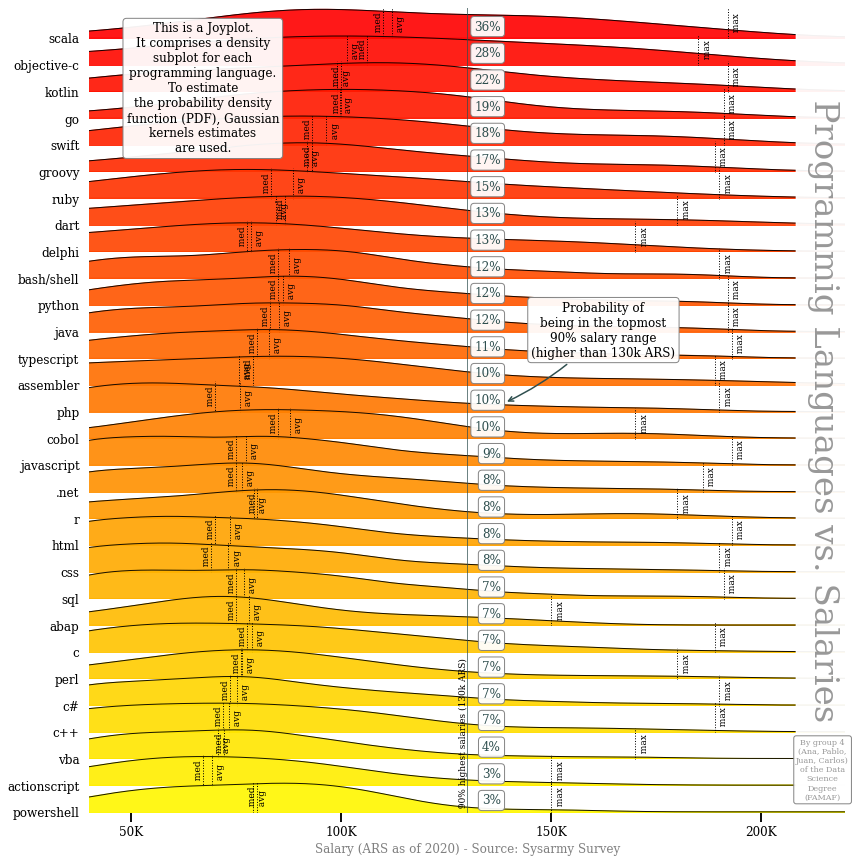

In [ ]:
# [Juan] 
# https://github.com/leotac/joypy/blob/master/joypy/joyplot.py
# https://github.com/leotac/joypy/issues/40
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

import matplotlib.transforms as transforms
import matplotlib.ticker as ticker

#filtered_df_filtrado = filtered_df_filtrado[filtered_df_filtrado.salary_monthly_NETO<200000]
df_lang_limpio_grouped = df_lang_limpio.groupby("programming_language", sort=False)

# Asumo que los que tienen un salario alto son los que estan en el percentil 90
# high_salary = df_lang.salary_monthly_NETO.quantile(0.9)

font = {'family': 'serif',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

plt.figure(dpi= 380)
fig, axes = joypy.joyplot(df_lang_limpio_grouped, column=['salary_monthly_NETO'], 
                          by="programming_language", ylim='own', 
                          #hist=True, bins=80,
                          figsize=(12,12), legend=False, grid=False,
                          linewidth=1, alpha=0.9, colormap=cm.autumn,
                          overlap=0.2)

# Intervene on each axis [Juan]
for axe in axes:
  language = axe.get_yticklabels()[0].get_text()
  if language != "":
    # average, median, min, max markers and labels
    avg = df_lang_limpio[df_lang_limpio.programming_language==language]["salary_monthly_NETO"].mean()
    axe.axvline(avg, 0, ls=':', c='black', lw=1, zorder=100)
    axe.text(avg + 1000, 0, "  avg  ", ha='left', va='bottom', zorder=100, size=9, rotation=90)
    median = df_lang_limpio[df_lang_limpio.programming_language==language]["salary_monthly_NETO"].median()
    axe.axvline(median, 0, ls=':', c='black', lw=1, zorder=100)
    axe.text(median, 0, "  med  ", ha='right', va='bottom', zorder=100, size=9, rotation=90)
    #min = df_lang_limpio[df_lang_limpio.programming_language==language]["salary_monthly_NETO"].min()
    #axe.axvline(min, 0, ls=':', c='black', lw=1, zorder=100)
    #axe.text(min, 0, " min ", ha='right', va='bottom', zorder=100, size=9, rotation=90)
    max = df_lang_limpio[df_lang_limpio.programming_language==language]["salary_monthly_NETO"].max()
    axe.axvline(max, 0, ls=':', c='black', lw=1, zorder=100)
    axe.text(max + 1000, 0, "  max  ", ha='left', va='bottom', zorder=100, size=9, rotation=90)
    # probability of being among 90% higher salaries
    prob = proba.loc[proba['programming_language'] == language].prob.to_string(index=False)
    prob = float(prob)*100
    trans = transforms.blended_transform_factory(axe.transData, axe.transAxes)
    axe.text(high_salary + 8000, 0.2, '{:,.0f}%'.format(prob), transform=trans, 
             ha='right', va='bottom', zorder=100, size=12, color='darkslategray',
             bbox=dict(boxstyle="round", color = 'white', ec="gray", lw=1, alpha=0.95))
    axe.set_xlim(40000, 220000)
  else:
    # Format main axis
    axe.set_zorder(100)
    axe.patch.set_alpha(0)
    axe.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # Plot high salary line and label (90 percentile)
    axe.axvline(high_salary, 0, ls='-', c='darkslategray', alpha=0.7, lw=1, zorder=100)
    axe.text(high_salary - 2000, 0, "  90% highest salaries ({:,.0f}k ARS) ".format(high_salary/1000), ha='left', va='bottom', zorder=100, size=9, rotation=90)
    # Text box explaining the % probability
    axe.annotate("Probability of\nbeing in the topmost\n90% salary range\n(higher than {:,.0f}k ARS)".format(high_salary/1000),
                 ha="center", va="center", 
                 xy=(0.55, 0.51), xycoords='axes fraction',
                 xytext=(0.68, 0.6), textcoords='axes fraction',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1", color='darkslategray'),
                 bbox=dict(boxstyle="round", color = 'white', alpha=0.95, ec="grey", lw=1)
            )
    # Text box explaining the plot
    text =  "This is a Joyplot.\nIt comprises a density\nsubplot for each\nprogramming language.\n"
    text += "To estimate\nthe probability density\nfunction (PDF), "
    text += "Gaussian\nkernels estimates\nare used."
    axe.text(0.15, 0.9, text, transform=axe.transAxes, ha="center", va="center", 
             fontsize=12, zorder=2,
             bbox=dict(boxstyle="round", color = 'white', alpha=0.95, ec="grey", lw=1))
    # Vertical title 
    text = '      Programmig Languages vs. Salaries      '
    axe.text(0.97, 0.5, text, transform=axe.transAxes, ha="center", va="center", 
             color='grey', alpha=0.8, fontsize=34, zorder=2, rotation=-90,
             bbox=dict(boxstyle="round", color = 'white', alpha=0.95))
    # Credits
    text = 'By group 4\n(Ana, Pablo,\nJuan, Carlos)\nof the Data\nScience\nDegree\n(FAMAF)'
    axe.text(0.97, 0.054, text, transform=axe.transAxes, ha="center", va="center", 
             color='grey', alpha=0.8, fontsize=8, zorder=2,
             bbox=dict(boxstyle="round", color = 'white', alpha=0.95, ec="grey", lw=1))
    axe.set_xlim(40000, 220000)
  
# Decoration
# plt.title('Programmig Languages vs. Salaries', fontsize=20, color='grey', alpha=1)
plt.rc("font", size=12)
plt.xlabel('Salary (ARS as of 2020) - Source: Sysarmy Survey',  fontsize=12, color='grey', alpha=1)
plt.ylabel('Language', fontsize=20,  color='grey', alpha=1)

plt.show
plt.savefig('joyplot.png')
plt.savefig('joyplot.pdf')

### Comunicacion Final

La comunicación final se puede acceder en este enlace: [link a la comunicación (1 página A4)](https://drive.google.com/open?id=1B8HWLB3pUGpgMsiCG0SXOnILkj2E0ZRV&authuser=juanfraire%40gmail.com&usp=drive_fs)